In [113]:
import h5py
import numpy as np
import pandas as pd


In [ ]:
/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/images/scene_cam_00_final_preview/frame.0000.color.jpg

In [3]:
'/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0099.semantic_instance.hdf5'

'/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0099.semantic_instance.hdf5'

In [4]:
name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/_detail/mesh/metadata_semantic_instance_bounding_box_object_aligned_2d_extents.hdf5'
name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/_detail/mesh/metadata_semantic_instance_bounding_box_object_aligned_2d_orientations.hdf5'
# name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/_detail/mesh/metadata_semantic_instance_bounding_box_object_aligned_2d_positions.hdf5'

In [ ]:
# name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0000.semantic.hdf5'
name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0000.render_entity_id.hdf5'
# name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0000.semantic_instance.hdf5'

In [142]:
def read_metada(frame):
    if frame < 10:
        frame = f'000{frame}'
    elif frame < 100:
        frame = f'00{frame}'

    semantic_instance = f'/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.{frame}.semantic_instance.hdf5'
    render_entity_id = f'/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.{frame}.render_entity_id.hdf5'

    semantic_file = h5py.File(semantic_instance, 'r')
    render_file = h5py.File(render_entity_id, 'r')

    for key in semantic_file.keys():
        semantic_dataset = semantic_file[key]
        semantic_array = semantic_dataset[:]

    for key in render_file.keys():
        render_dataset = render_file[key]
        render_array = render_dataset[:]

    return semantic_array, render_array

In [134]:
semantic_array

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [52, 52, 52, ..., 23, 23, 23],
       [52, 52, 52, ..., 23, 23, 23],
       [52, 52, 52, ..., 23, 23, 23]], dtype=int16)

In [24]:
label_to_name = {}

metadata = f'/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/_detail/metadata_nodes.csv'
metadata_df = pd.read_csv(metadata)

frame = 0

while len(label_to_name) < 55:
    semantic_array, render_array = read_metada(frame)


    for label in range(1, 57):
        NYU40_label = label
        position = np.where(semantic_array == NYU40_label)
        unique, counts = np.unique(render_array[position], return_counts=True)
        # unique[0]
        if label not in label_to_name:
            if len(unique):
                name = metadata_df[metadata_df['node_id'] == unique[0]]['object_name'].values[0]
                label_to_name[label] = name
    
    print(len(label_to_name))
    frame += 1


32
33
37
43
43
43
43
43
45
46
46
46
46
46
46
47
47
47
47
47
47
47
52
52
53
54
55


In [27]:
label_to_name[35]

'toilet_bowl'

In [146]:
sorted(label_to_name.keys())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55]

In [125]:
unique

array([], dtype=int16)

,node_id,node_name,object_id,object_name
0,1,toilet_bowl@node_20,0,toilet_bowl
1,2,ceiling@node_2248,1,ceiling
2,3,shelf_02@node_6424,2,shelf_02
3,4,shelf_01@node_3883,3,shelf_01
4,5,cabinet@node_8422,4,cabinet
...,...,...,...,...
1389,1390,perfume3_obj_06@node_18278,1387,perfume3_obj_06
1390,1391,nail_polish_obj_01@node_9270,1388,nail_polish_obj_01
1391,1392,nail_polish_obj_02@node_9268,1389,nail_polish_obj_02
1392,1393,nail_polish_obj_03@node_9269,1390,nail_polish_obj_03


In [105]:
f = h5py.File(name, 'r')



In [106]:
for key in f.keys():
    print(key) #Names of the root level object names in HDF5 file - can be groups or datasets.
    print(f[key]) # get the object type: usually group or dataset

    dataset = f[key]
    numpy_array = dataset[:]

dataset
<HDF5 dataset "dataset": shape (768, 1024), type "<i2">


In [107]:
# numpy_array now contains the data from the HDF5 dataset
print(numpy_array.shape)  # Output: (768, 1024)
print(numpy_array.dtype)  # Output: int16 (corresponding to "<i2")

(768, 1024)
int16


In [108]:
numpy_array

array([[572, 572, 572, ...,   2,   2,   2],
       [572, 572, 572, ...,   2,   2,   2],
       [572, 572, 572, ...,   2,   2,   2],
       ...,
       [687, 687, 687, ...,   5,   5,   5],
       [687, 687, 687, ...,   5,   5,   5],
       [687, 687, 687, ...,   5,   5,   5]], dtype=int16)

In [109]:
np.unique(numpy_array)

array([   2,    4,    5,    7,    8,    9,   10,   11,   12,   18,   21,
         22,   23,   27,   28,   29,   30,   31,   36,   37,   38,   39,
         40,   41,   47,   48,   49,   50,   51,   52,   59,   60,   61,
         62,  166,  168,  172,  173,  182,  183,  184,  185,  186,  190,
        191,  300,  301,  302,  303,  304,  305,  308,  309,  311,  312,
        314,  315,  316,  320,  321,  323,  324,  326,  327,  328,  329,
        330,  331,  333,  334,  336,  337,  339,  340,  344,  374,  375,
        376,  383,  384,  385,  386,  387,  388,  389,  414,  426,  427,
        428,  429,  430,  433,  435,  437,  438,  439,  440,  441,  442,
        443,  444,  445,  446,  447,  448,  449,  450,  451,  452,  453,
        454,  456,  457,  458,  459,  460,  462,  463,  464,  465,  466,
        467,  468,  469,  470,  471,  472,  473,  474,  523,  524,  525,
        526,  527,  528,  536,  537,  538,  539,  545,  546,  547,  548,
        552,  554,  556,  557,  558,  559,  563,  5

In [101]:
unique, counts = np.unique(numpy_array, return_counts=True)
unique, counts

(array([-1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 52, 54],
       dtype=int16),
 array([509304,   1291,    749,   9257,   1442,  28573,  27554,  29002,
         50553,   3576,    259,    469,     90,     87,    237,   1417,
         34434,    249,    220,  16219,  31666,   1994,    101,     31,
            35,     33,     85,     95,     90,     56,     69,  35663,
          1532]))

In [102]:
pos_4 = np.where(numpy_array == 4)

In [110]:
unique, counts = np.unique(numpy_array[pos_4], return_counts=True)
unique, counts

(array([324], dtype=int16), array([1291]))

In [11]:
import h5py
import numpy as np
import cv2
from PIL import Image

# File paths
image_path = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/images/scene_cam_00_final_preview/frame.0000.color.jpg'
semantic_path = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0000.semantic_instance.hdf5'
output_path = 'output/output_with_bboxes.jpg'

# Load the image
image = cv2.imread(image_path)

# Load the semantic segmentation data
with h5py.File(semantic_path, 'r') as hdf:
    semantic_data = hdf['dataset'][:]  # Assuming the dataset name is "dataset"

# Find unique object IDs (exclude background)
object_ids = np.unique(semantic_data)
object_ids = object_ids[object_ids != -1]  # Exclude background (-1)

# Iterate through each object and draw bounding boxes
for obj_id in object_ids:
    # Get coordinates where the object appears
    rows, cols = np.where(semantic_data == obj_id)
    
    # Compute bounding box
    min_row, max_row = rows.min(), rows.max()
    min_col, max_col = cols.min(), cols.max()
    
    # Draw rectangle on the image
    color = (0, 255, 0)  # Green color for the bounding box
    thickness = 2        # Thickness of the rectangle
    cv2.rectangle(image, (min_col, min_row), (max_col, max_row), color, thickness)

# Save the resulting image
cv2.imwrite(output_path, image)

# Display the resulting image (optional)
Image.open(output_path).show()

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


In [13]:
# !pip install opencv-python

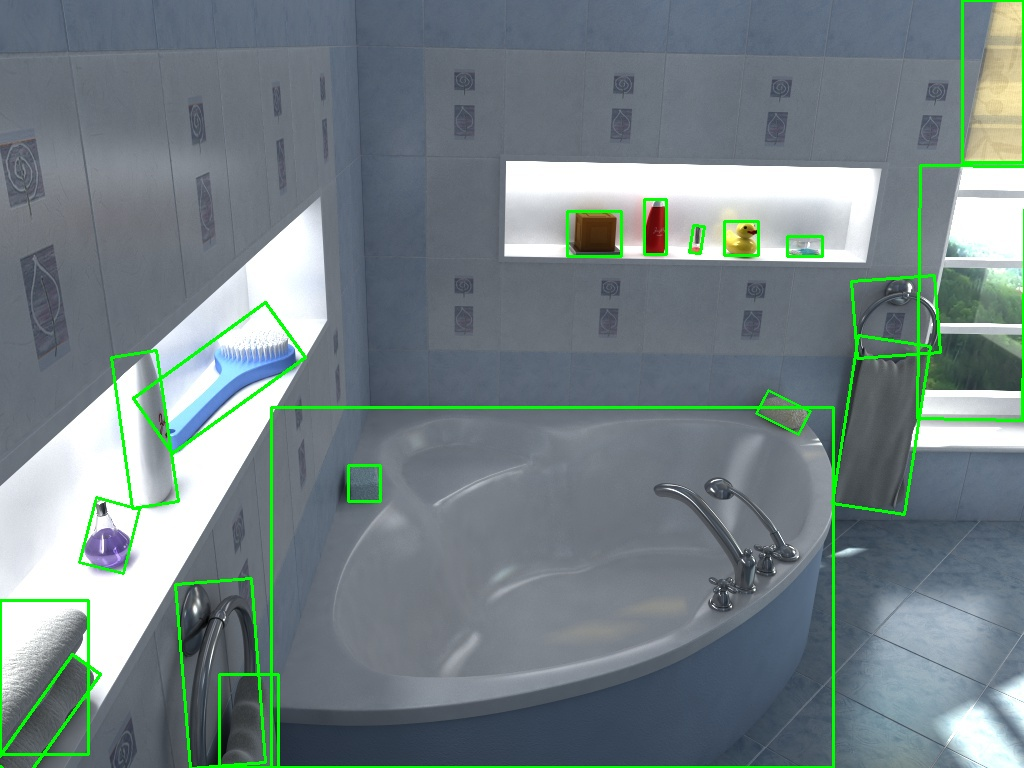

In [14]:
import h5py
import numpy as np
import cv2
from PIL import Image

# File paths
image_path = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/images/scene_cam_00_final_preview/frame.0003.color.jpg'
semantic_path = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0003.semantic_instance.hdf5'
output_path = 'output/output_with_rotated_bboxes.jpg'

# Load the image
image = cv2.imread(image_path)

# Load the semantic segmentation data
with h5py.File(semantic_path, 'r') as hdf:
    semantic_data = hdf['dataset'][:]  # Assuming the dataset name is "dataset"

# Find unique object IDs (excluding background)
object_ids = np.unique(semantic_data)
object_ids = object_ids[object_ids != -1]  # Exclude background (-1)

# Iterate through each object and draw rotated bounding boxes
for obj_id in object_ids:
    # Get coordinates where the object appears
    rows, cols = np.where(semantic_data == obj_id)
    points = np.column_stack((cols, rows))  # Points as (x, y) for OpenCV

    # Compute the rotated bounding box
    rect = cv2.minAreaRect(points)  # Returns (center, size, angle)
    box = cv2.boxPoints(rect)       # Get box corners
    box = box.astype(int)  # Convert to integer coordinates

    # Draw the rotated bounding box
    color = (0, 255, 0)  # Green color for the bounding box
    cv2.drawContours(image, [box], 0, color, 2)

# Save the resulting image
cv2.imwrite(output_path, image)

# Display the resulting image (optional)
Image.open(output_path)

In [32]:
import h5py
import numpy as np

# File paths (example)
extents_path = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/_detail/mesh/metadata_semantic_instance_bounding_box_object_aligned_2d_extents.hdf5'
orientations_path = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/_detail/mesh/metadata_semantic_instance_bounding_box_object_aligned_2d_orientations.hdf5'
positions_path = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_001_001/_detail/mesh/metadata_semantic_instance_bounding_box_object_aligned_2d_positions.hdf5'

# Load data
with h5py.File(extents_path, 'r') as f:
    extents = f['dataset'][1:]  # (N, 3) extents

with h5py.File(orientations_path, 'r') as f:
    orientations = f['dataset'][1:]  # (N, 3, 3) rotation matrices

with h5py.File(positions_path, 'r') as f:
    positions = f['dataset'][1:]  # (N, 3) positions

In [33]:
orientations[0]

array([[-0.09584529, -0.99539624,  0.        ],
       [ 0.99539624, -0.09584529,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [17]:
extents.shape

(55, 3)

In [18]:
def compute_bbox_corners(position, extent, orientation):
    # Define object-space corners of the bounding box
    x, y, z = extent / 2  # Half-sizes
    corners = np.array([
        [-x, -y, -z],
        [ x, -y, -z],
        [ x,  y, -z],
        [-x,  y, -z],
        [-x, -y,  z],
        [ x, -y,  z],
        [ x,  y,  z],
        [-x,  y,  z]
    ])

    # Transform corners to world space
    world_corners = (orientation @ corners.T).T + position
    return world_corners

In [19]:
all_corners = []
for i in range(len(positions)):
    corners = compute_bbox_corners(positions[i], extents[i], orientations[i])
    all_corners.append(corners)

In [20]:
def get_top_down_view(corners_3d):
    """
    Projects 3D bounding box corners onto the XY-plane for a top-down view.

    Args:
        corners_3d (np.ndarray): Array of shape (8, 3), representing the 3D corners of a bounding box.

    Returns:
        np.ndarray: Array of shape (4, 2), representing the 2D bounding box in the XY-plane.
    """
    # Extract only the X and Y components of the corners
    corners_2d = corners_3d[:, :2]  # Drop the Z coordinate

    corners_2d = corners_2d.astype(np.float32)

    # Find the convex hull of the projected points to get a clean bounding shape
    hull_indices = cv2.convexHull(corners_2d, returnPoints=False).flatten()
    return corners_2d[hull_indices]

In [21]:
top_down_boxes = []
for corners_3d in all_corners:  # all_corners is a list of (8, 3) arrays
    top_down_box = get_top_down_view(corners_3d)
    top_down_boxes.append(top_down_box)

In [129]:
top_down_boxes

[array([[ -0.8154963 , -83.60003   ],
        [ -7.085121  , -84.20372   ],
        [ -6.481427  , -90.47335   ],
        [ -0.21180233, -89.86966   ]], dtype=float32),
 array([[ -2.952282 , -76.743965 ],
        [ -4.5038176, -77.4862   ],
        [ -2.9378612, -80.75959  ],
        [ -1.3863257, -80.01735  ]], dtype=float32),
 array([[ -3.0656264, -73.019966 ],
        [ -3.6310956, -71.97591  ],
        [ -4.675146 , -72.541374 ],
        [ -4.1096773, -73.585434 ]], dtype=float32),
 array([[  0.08389674, -66.88751   ],
        [ -2.088933  , -63.819756  ],
        [ -6.3262787 , -66.820984  ],
        [ -4.153449  , -69.88874   ]], dtype=float32),
 array([[ -2.2276669, -58.743645 ],
        [ -3.9281235, -55.097004 ],
        [ -6.503252 , -56.297806 ],
        [ -4.8027954, -59.944447 ]], dtype=float32),
 array([[  0.38665828, -39.363567  ],
        [  0.2867267 , -50.398727  ],
        [  3.548478  , -50.428265  ],
        [  3.6484096 , -39.393105  ]], dtype=float32),
 array([[ 

In [22]:
# import cv2
# import numpy as np

# # Canvas size for visualization
# canvas_size = (1000, 1000, 3)  # 1000x1000 image with 3 color channels
# canvas = np.zeros(canvas_size, dtype=np.uint8)

# # Scale and translate function for better visualization
# def scale_and_translate(points, scale=50, offset=(500, 500)):
#     return (points * scale + offset).astype(np.int32)

# # Draw the bounding boxes
# for box in top_down_boxes:
#     # Scale and translate to fit in the canvas
#     scaled_box = scale_and_translate(box)
#     cv2.polylines(canvas, [scaled_box], isClosed=True, color=(0, 255, 0), thickness=2)

# # Display the result
# cv2.imshow('Top-Down View', canvas)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [27]:
min_x = 0
max_x = 0
min_y = 0
max_y = 0

for box in top_down_boxes:
    min_x = min(min_x, box[:, 0].min())
    max_x = max(max_x, box[:, 0].max())
    min_y = min(min_y, box[:, 1].min())
    max_y = max(max_y, box[:, 1].max())    

In [130]:
min_x, max_x, min_y, max_y

(np.float32(-10.907661),
 np.float32(157.45673),
 np.float32(-129.3699),
 np.float32(19.758554))

In [ ]:
meters_per_unit = 0.02539999969303608
top_down_meter_boxes = []

for i, obj in enumerate(top_down_boxes):
    print('NY40:', i + 1)
    if (i + 1) in label_to_name:
        print('Name:', label_to_name[i + 1])
    print(obj * meters_per_unit * 100)
    top_down_meter_boxes.append(obj * meters_per_unit * 100)

In [200]:
min_x = 0
max_x = 0
min_y = 0
max_y = 0

for box in top_down_meter_boxes:
    min_x = min(min_x, box[:, 0].min())
    max_x = max(max_x, box[:, 0].max())
    min_y = min(min_y, box[:, 1].min())
    max_y = max(max_y, box[:, 1].max())

In [201]:
min_x, max_x, min_y, max_y

(np.float32(-27.705462),
 np.float32(399.9401),
 np.float32(-328.59955),
 np.float32(50.18673))

In [184]:
def scale_boxes_to_origin(boxes, x_min, y_min):
    """
    Scale boxes so that the minimum x and y coordinates are at the origin (0, 0).

    Args:
        boxes (list of np.ndarray): List of 2D bounding boxes.
        x_min (float): Minimum x coordinate.
        y_min (float): Minimum y coordinate.

    Returns:
        list of np.ndarray: Scaled bounding boxes.
    """
    scaled_boxes = []
    for box in boxes:
        scaled_box = box.copy()
        scaled_box[:, 0] -= x_min
        scaled_box[:, 1] -= y_min
        scaled_boxes.append(scaled_box)
    return scaled_boxes

# Scale the top_down_meter_boxes
scaled_top_down_meter_boxes = scale_boxes_to_origin(top_down_meter_boxes, min_x, min_y)

In [204]:
min_x = 0
max_x = 0
min_y = 0
max_y = 0

for i, box in enumerate(scaled_top_down_meter_boxes):
    min_x = min(min_x, box[:, 0].min())
    max_x = max(max_x, box[:, 0].max())
    min_y = min(min_y, box[:, 1].min())
    max_y = max(max_y, box[:, 1].max())

min_x, max_x, min_y, max_y

(0, np.float32(427.64557), 0, np.float32(378.7863))

In [186]:
for i, box in enumerate(scaled_top_down_meter_boxes):
    label = label_to_name.get(i + 1, 'Unknown').split('_obj')[0]
    print(label)
    print(box)
    diagonal = np.linalg.norm(box[0] - box[2])
    print(f"Diagonal: {diagonal}")
    print()

tray
[[ 25.634102 116.25548 ]
 [  9.709255 114.72211 ]
 [ 11.242636  98.79726 ]
 [ 27.167484 100.33061 ]]
Diagonal: 22.62529182434082

shampoo2
[[ 20.206665 133.66988 ]
 [ 16.265766 131.7846  ]
 [ 20.243294 123.470184]
 [ 24.184195 125.355484]]
Diagonal: 10.19975757598877

nail_polish
[[ 19.91877 143.12883]
 [ 18.48248 145.78076]
 [ 15.83059 144.34447]
 [ 17.26688 141.69254]]
Diagonal: 4.265089511871338

duck
[[ 27.91856  158.70528 ]
 [ 22.399572 166.49738 ]
 [ 11.636713 158.87425 ]
 [ 17.1557   151.08215 ]]
Diagonal: 16.282724380493164

cotton_bud
[[ 22.047188 179.39069 ]
 [ 17.728027 188.65315 ]
 [ 11.187201 185.60312 ]
 [ 15.506361 176.34065 ]]
Diagonal: 12.511341094970703

towel1
[[ 28.687574 228.61609 ]
 [ 28.433748 200.58678 ]
 [ 36.718594 200.51175 ]
 [ 36.97242  228.54106 ]]
Diagonal: 29.229286193847656

towel1
[[ 33.07822  228.51343 ]
 [ 27.997995 228.51343 ]
 [ 27.997995 199.40503 ]
 [ 33.07822  199.40503 ]]
Diagonal: 29.54839324951172

roller2_blind
[[ 10.570095 294.04657 ]


In [ ]:
furniture_list = {'furniture_list': {}}

for i, box in enumerate(scaled_top_down_meter_boxes):
    # Retrieve the label and format it
    label = label_to_name.get(i + 1, 'Unknown').split('_obj')[0]
    
    # Sort the points based on x and y coordinates to find corners
    sorted_points = sorted(box, key=lambda p: (p[0], p[1]))  # Sort by x, then by y
    
    # Top-left: smallest x and largest y
    top_left = max(sorted_points[:2], key=lambda p: p[1])
    
    # Top-right: largest x and largest y
    top_right = max(sorted_points[2:], key=lambda p: p[1])
    
    # Bottom-left: smallest x and smallest y
    bottom_left = min(sorted_points[:2], key=lambda p: p[1])
    
    # Bottom-right: largest x and smallest y
    bottom_right = min(sorted_points[2:], key=lambda p: p[1])
    
    # Calculate the diagonal length of the box
    diagonal = np.linalg.norm(top_left - bottom_right)
    
    # Add the furniture item to the list
    furniture_list['furniture_list'][label] = {
        'left_bot_corner': bottom_left.tolist(),
        'top_left_corner': top_left.tolist(),
        'top_right_corner': top_right.tolist(),
        'bottom_right_corner': bottom_right.tolist(),
    }

# Output the structured furniture list
# Output the structured furniture list as JSON
print(json.dumps(furniture_list, indent=4))

{
    "furniture_list": {
        "tray": {
            "left_bot_corner": [
                11.242635726928711,
                98.79725646972656
            ],
            "top_left_corner": [
                9.70925521850586,
                114.72210693359375
            ],
            "top_right_corner": [
                25.63410186767578,
                116.25547790527344
            ],
            "bottom_right_corner": [
                27.167484283447266,
                100.33061218261719
            ]
        },
        "shampoo2": {
            "left_bot_corner": [
                16.265766143798828,
                131.78460693359375
            ],
            "top_left_corner": [
                20.2066650390625,
                133.6698760986328
            ],
            "top_right_corner": [
                24.184194564819336,
                125.35548400878906
            ],
            "bottom_right_corner": [
                20.24329376220703,
                123.

In [173]:
# import cv2
# import numpy as np

# # Function to scale and translate points for visualization
# def scale_and_translate(points, scale=50, offset=(500, 500)):
#     return (points + offset).astype(np.int32)

# # Initialize a blank canvas
# canvas_size = (1000, 1000, 3)  # Example canvas dimensions
# canvas = np.zeros(canvas_size, dtype=np.uint8)

# # Draw bounding boxes on the canvas
# for box in top_down_boxes:  # Assume top_down_boxes is a list of 2D bounding boxes
#     # Scale and translate to fit on the canvas
#     scaled_box = scale_and_translate(box)
#     cv2.polylines(canvas, [scaled_box], isClosed=True, color=(0, 255, 0), thickness=2)

# # Save the image to an output path
# output_path = "output/top_down_view.png"  # Replace with your desired file path
# cv2.imwrite(output_path, canvas)
# print(f"Image saved to {output_path}")


In [191]:
min_x, max_x, min_y, max_y

(np.float32(-27.705462),
 np.float32(399.9401),
 np.float32(-328.59955),
 np.float32(50.18673))

In [205]:
import cv2
import numpy as np
import os

# Function to normalize and translate points for visualization
def normalize_and_translate(points, x_min, x_max, y_min, y_max, canvas_width=1000, canvas_height=1000):
    """
    Normalize points to fit within the canvas dimensions.

    Args:
        points (np.ndarray): Array of shape (N, 2), representing the bounding box points.
        x_min, x_max, y_min, y_max (float): Data bounds.
        canvas_width, canvas_height (int): Dimensions of the output canvas.

    Returns:
        np.ndarray: Normalized and translated points as integers for visualization.
    """
    # Normalize points to the range [0, 1]
    points[:, 0] = (points[:, 0] - x_min) / (x_max - x_min)  # Normalize X
    points[:, 1] = (points[:, 1] - y_min) / (y_max - y_min)  # Normalize Y

    # Scale to canvas size
    points[:, 0] *= canvas_width
    points[:, 1] *= canvas_height

    return points.astype(np.int32)

# Initialize a blank canvas
canvas_size = (1000, 1000, 3)  # Example canvas dimensions
canvas = np.zeros(canvas_size, dtype=np.uint8)

# Draw bounding boxes on the canvas
for i, box in enumerate(scaled_top_down_meter_boxes):  # Assume top_down_boxes is a list of 2D bounding boxes
    # Normalize and translate the bounding box

    normalized_box = normalize_and_translate(np.array(box), min_x, max_x, min_y, max_y)
    cv2.polylines(canvas, [normalized_box], isClosed=True, color=(0, 255, 0), thickness=2)

    # Add label to the bounding box
    label = label_to_name.get(i + 1, 'Unknown').split('_obj')[0]

    print(label)
    print(box)
    print()

    text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1)[0]
    text_x = int((normalized_box[:, 0].min() + normalized_box[:, 0].max() - text_size[0]) / 2)
    text_y = int((normalized_box[:, 1].min() + normalized_box[:, 1].max() + text_size[1]) / 2)
    cv2.putText(canvas, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1, cv2.LINE_AA)

# Save the image to an output path
output_path = "output/scaled_top_down_view.png"  # Replace with your desired file path
os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Create directory if it doesn't exist
cv2.imwrite(output_path, canvas)
print(f"Image saved to {output_path}")


tray
[[ 25.634102 116.25548 ]
 [  9.709255 114.72211 ]
 [ 11.242636  98.79726 ]
 [ 27.167484 100.33061 ]]

shampoo2
[[ 20.206665 133.66988 ]
 [ 16.265766 131.7846  ]
 [ 20.243294 123.470184]
 [ 24.184195 125.355484]]

nail_polish
[[ 19.91877 143.12883]
 [ 18.48248 145.78076]
 [ 15.83059 144.34447]
 [ 17.26688 141.69254]]

duck
[[ 27.91856  158.70528 ]
 [ 22.399572 166.49738 ]
 [ 11.636713 158.87425 ]
 [ 17.1557   151.08215 ]]

cotton_bud
[[ 22.047188 179.39069 ]
 [ 17.728027 188.65315 ]
 [ 11.187201 185.60312 ]
 [ 15.506361 176.34065 ]]

towel1
[[ 28.687574 228.61609 ]
 [ 28.433748 200.58678 ]
 [ 36.718594 200.51175 ]
 [ 36.97242  228.54106 ]]

towel1
[[ 33.07822  228.51343 ]
 [ 27.997995 228.51343 ]
 [ 27.997995 199.40503 ]
 [ 33.07822  199.40503 ]]

roller2_blind
[[ 10.570095 294.04657 ]
 [ 10.570086 234.28032 ]
 [ 15.166573 234.28032 ]
 [ 15.166581 294.04657 ]]

window2
[[1.4202919e+01 2.2673897e+02]
 [1.4202914e+01 3.0253644e+02]
 [0.0000000e+00 3.0253644e+02]
 [5.7220459e-06 2.267

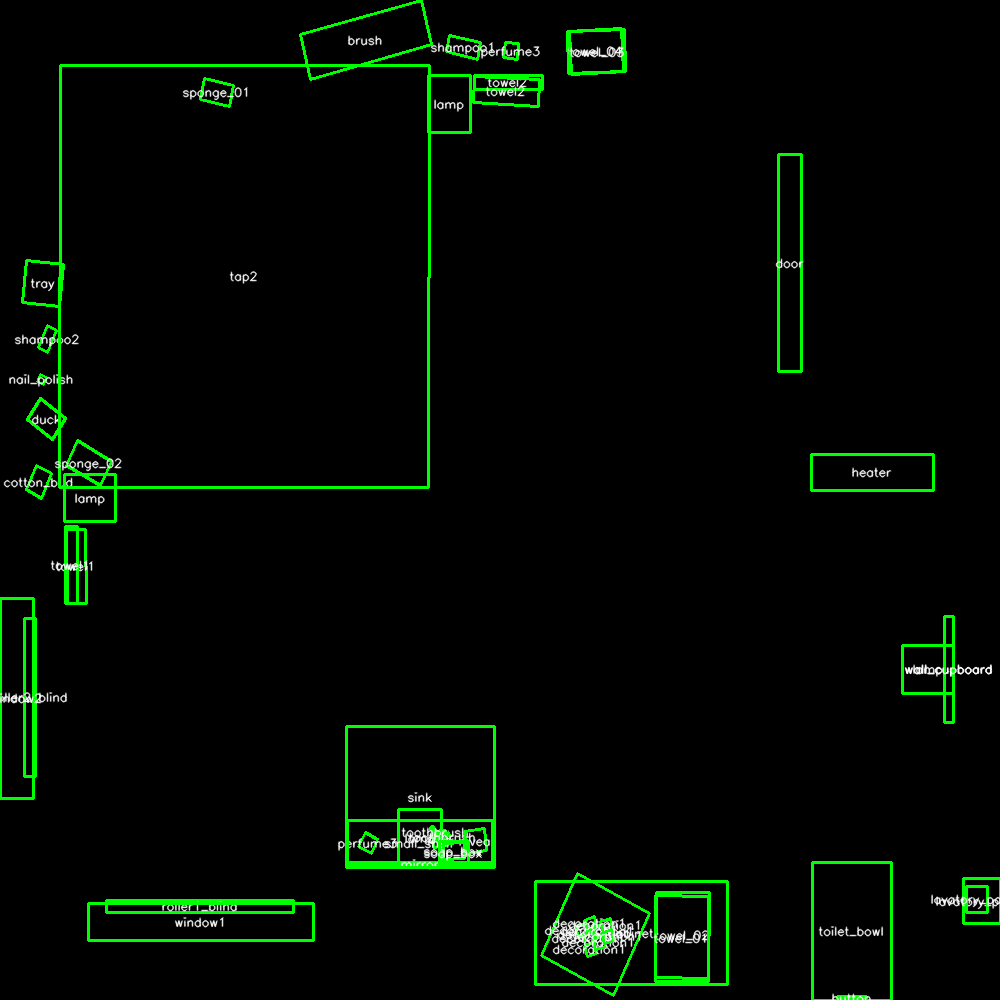

In [206]:
from PIL import Image

import IPython.display as display

# Load and display the image
image_path = "output/scaled_top_down_view.png"
image = Image.open(image_path)
display.display(image)

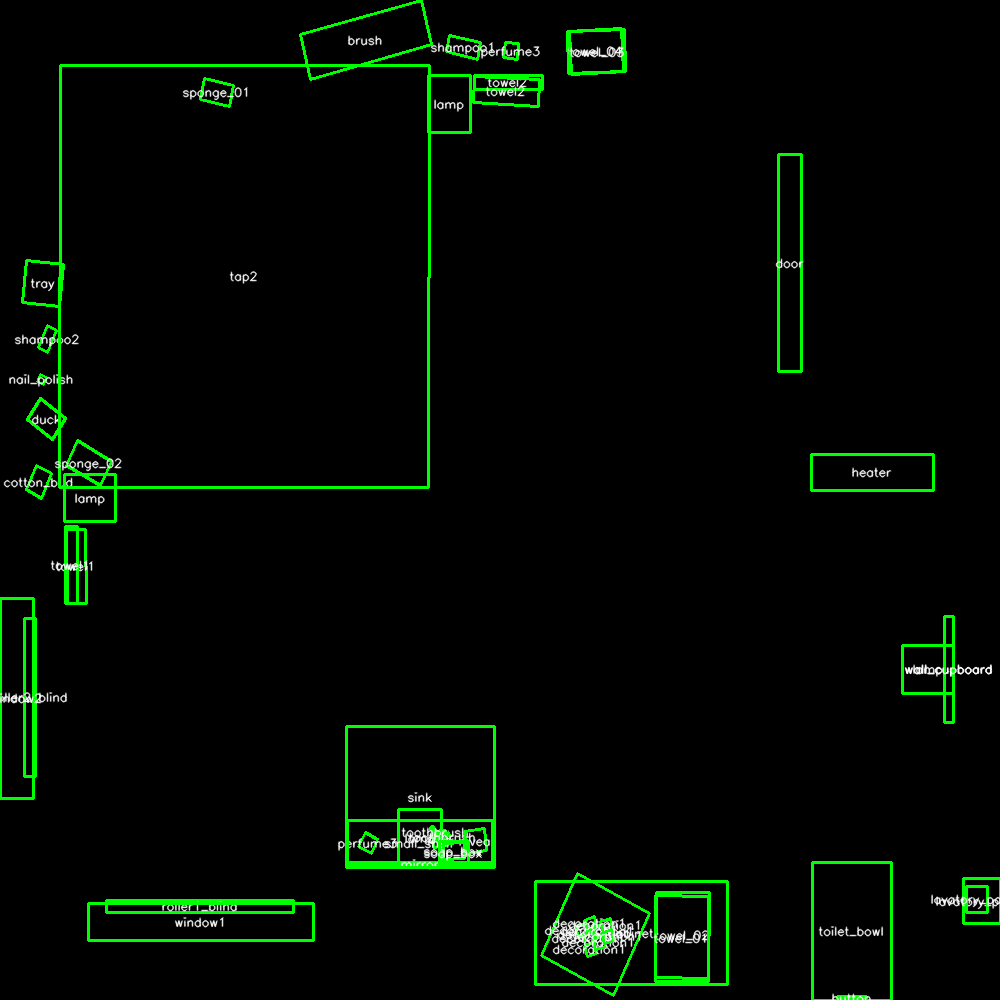

In [203]:
from PIL import Image

import IPython.display as display

# Load and display the image
image_path = "output/top_down_view.png"
image = Image.open(image_path)
display.display(image)

Road Map

* Add labeling
* Add random scene and bounding boxes projection

# Create sizes dataset, and position?

In [ ]:
scene_id = 'ai_001_001'

In [ ]:
def read_metada(frame):
    if frame < 10:
        frame = f'000{frame}'
    elif frame < 100:
        frame = f'00{frame}'

    semantic_instance = f'/home/rodionfa/3d_box_data/ml-hypersim/data/{scene_id}/images/scene_cam_00_geometry_hdf5/frame.{frame}.semantic_instance.hdf5'
    render_entity_id = f'/home/rodionfa/3d_box_data/ml-hypersim/data/{scene_id}/images/scene_cam_00_geometry_hdf5/frame.{frame}.render_entity_id.hdf5'

    semantic_file = h5py.File(semantic_instance, 'r')
    render_file = h5py.File(render_entity_id, 'r')

    for key in semantic_file.keys():
        semantic_dataset = semantic_file[key]
        semantic_array = semantic_dataset[:]

    for key in render_file.keys():
        render_dataset = render_file[key]
        render_array = render_dataset[:]

    return semantic_array, render_array

In [ ]:
def compute_bbox_corners(position, extent, orientation):
    # Define object-space corners of the bounding box
    x, y, z = extent / 2  # Half-sizes
    corners = np.array([
        [-x, -y, -z],
        [ x, -y, -z],
        [ x,  y, -z],
        [-x,  y, -z],
        [-x, -y,  z],
        [ x, -y,  z],
        [ x,  y,  z],
        [-x,  y,  z]
    ])

    # Transform corners to world space
    world_corners = (orientation @ corners.T).T + position
    return world_corners

In [153]:
import os

# Directory path
directory_path = '/home/rodionfa/3d_box_data/ml-hypersim/data/'

# Get list of all folders in the directory
folders = [name for name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, name))]
folders.sort()

print(folders[:10])

['ai_001_001', 'ai_001_002', 'ai_001_003', 'ai_001_004', 'ai_001_005', 'ai_001_006', 'ai_001_007', 'ai_001_008', 'ai_001_009', 'ai_001_010']


In [187]:
def compute_box_sizes(vertices):
    """
    Compute the sizes of the box along x, y, and z axes.

    Args:
        vertices (np.ndarray): Array of shape (8, 3), representing the 8 vertices of the box.

    Returns:
        tuple: Sizes along x, y, and z axes.
    """
    x_size = vertices[:, 0].max() - vertices[:, 0].min()
    y_size = vertices[:, 1].max() - vertices[:, 1].min()
    z_size = vertices[:, 2].max() - vertices[:, 2].min()
    return x_size * meters_per_unit * 100, y_size * meters_per_unit * 100, z_size * meters_per_unit * 100

In [188]:
total_df = pd.DataFrame()

for scene_id in folders[10:11]:
    print("Scene_id:", scene_id)

    extents_path = f'/home/rodionfa/3d_box_data/ml-hypersim/data/{scene_id}/_detail/mesh/metadata_semantic_instance_bounding_box_object_aligned_2d_extents.hdf5'
    orientations_path = f'/home/rodionfa/3d_box_data/ml-hypersim/data/{scene_id}/_detail/mesh/metadata_semantic_instance_bounding_box_object_aligned_2d_orientations.hdf5'
    positions_path = f'/home/rodionfa/3d_box_data/ml-hypersim/data/{scene_id}/_detail/mesh/metadata_semantic_instance_bounding_box_object_aligned_2d_positions.hdf5'

    # Load data
    with h5py.File(extents_path, 'r') as f:
        extents = f['dataset'][1:]  # (N, 3) extents

    with h5py.File(orientations_path, 'r') as f:
        orientations = f['dataset'][1:]  # (N, 3, 3) rotation matrices

    with h5py.File(positions_path, 'r') as f:
        positions = f['dataset'][1:]  # (N, 3) positions

    number_of_objects = positions.shape[0]

    label_to_name = {}

    metadata = f'/home/rodionfa/3d_box_data/ml-hypersim/data/{scene_id}/_detail/metadata_nodes.csv'
    metadata_df = pd.read_csv(metadata)

    possible_frames = range(100)

    frame_index = 0

    while len(label_to_name) < number_of_objects and frame_index < len(possible_frames):
        try:
            semantic_array, render_array = read_metada(possible_frames[frame_index])
        except Exception as e:
            print(f"Error reading metadata for frame {possible_frames[frame_index]}: {e}")
            frame_index += 1
            continue

        for label in range(1, number_of_objects + 1):
            NYU40_label = label
            position = np.where(semantic_array == NYU40_label)
            unique, counts = np.unique(render_array[position], return_counts=True)
            # unique[0]
            if label not in label_to_name:
                if len(unique):
                    name = metadata_df[metadata_df['node_id'] == unique[0]]['object_name'].values[0]
                    label_to_name[label] = name
        frame_index += 1

    print(len(label_to_name))

    all_corners = []
    for i in range(len(positions)):
        corners = compute_bbox_corners(positions[i], extents[i], orientations[i])
        all_corners.append(corners)

    metadata_scene = pd.read_csv(f'/home/rodionfa/3d_box_data/ml-hypersim/data/{scene_id}/_detail/metadata_scene.csv')
    meters_per_unit = metadata_scene['parameter_value'][0]


    label_to_size = {}
    for i, box in enumerate(all_corners):
        x_size, y_size, z_size = compute_box_sizes(box)
        label_to_size[i + 1] = (x_size, y_size, z_size)

    for frame_index in range(30):
        try:
            semantic_array, render_array = read_metada(frame_index)
        except Exception as e:
            print(f"Error reading metadata for frame {frame_index}: {e}")
            frame_index += 1
            continue

        questions = []
        answers = []

        for label in range(1, number_of_objects + 1):
            NYU40_label = label
            position = np.where(semantic_array == NYU40_label)
            unique, counts = np.unique(render_array[position], return_counts=True)

            if label not in label_to_name:
                continue
            onject_name = label_to_name[label].split('_obj')[0]
            if len(unique):
                
                questions.append(f"What is the size of the {onject_name} in cm? Length, width and height.")
                answers.append(f"Object {onject_name} has the following size:\nLength: {round(label_to_size[label][0], 2)} cm,\nwidth: {round(label_to_size[label][1], 2)} cm,\nheight: {round(label_to_size[label][2], 2)} cm")
                # print(f"Object {onject_name} has the following size:\nLength: {round(label_to_size[label][0], 2)} cm,\nwidth: {round(label_to_size[label][1], 2)} cm,\nheight: {round(label_to_size[label][2], 2)} cm")
                # print()
        frame_index += 1

        frame = f"000{frame_index}" if frame_index < 10 else f"00{frame_index}"
        image_path = f"/home/rodionfa/3d_box_data/ml-hypersim/data/{scene_id}/images/scene_cam_00_final_preview/frame.{frame}.color.jpg"

        data = {
            'Question': questions,
            'Answer': answers,
            'Image Path': [image_path] * len(questions)
        }

        df = pd.DataFrame(data)
        total_df = pd.concat([total_df, df], ignore_index=True)

Scene_id: ai_002_001
Error reading metadata for frame 4: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_002_001/images/scene_cam_00_geometry_hdf5/frame.0004.semantic_instance.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading metadata for frame 5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_002_001/images/scene_cam_00_geometry_hdf5/frame.0005.semantic_instance.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading metadata for frame 6: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_002_001/images/scene_cam_00_geometry_hdf5/frame.0006.semantic_instance.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading metadata for frame 7

/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in matmul
  world_corners = (orientation @ corners.T).T + position
/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in add
  world_corners = (orientation @ corners.T).T + position


Error reading metadata for frame 4: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_002_001/images/scene_cam_00_geometry_hdf5/frame.0004.semantic_instance.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading metadata for frame 5: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_002_001/images/scene_cam_00_geometry_hdf5/frame.0005.semantic_instance.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading metadata for frame 6: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_002_001/images/scene_cam_00_geometry_hdf5/frame.0006.semantic_instance.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading metadata for frame 7: [Errno 2] Unable to

In [189]:
total_df

,Question,Answer,Image Path
0,"What is the size of the sofa01 in cm? Length, ...",Object sofa01 has the following size:\nLength:...,/home/rodionfa/3d_box_data/ml-hypersim/data/ai...
1,What is the size of the table_small_01 in cm? ...,Object table_small_01 has the following size:\...,/home/rodionfa/3d_box_data/ml-hypersim/data/ai...
2,"What is the size of the book_03 in cm? Length,...",Object book_03 has the following size:\nLength...,/home/rodionfa/3d_box_data/ml-hypersim/data/ai...
3,"What is the size of the palm_02 in cm? Length,...",Object palm_02 has the following size:\nLength...,/home/rodionfa/3d_box_data/ml-hypersim/data/ai...
4,What is the size of the HI_FI_09 in cm? Length...,Object HI_FI_09 has the following size:\nLengt...,/home/rodionfa/3d_box_data/ml-hypersim/data/ai...
...,...,...,...
430,What is the size of the detail_02 in cm? Lengt...,Object detail_02 has the following size:\nLeng...,/home/rodionfa/3d_box_data/ml-hypersim/data/ai...
431,What is the size of the detail_03 in cm? Lengt...,Object detail_03 has the following size:\nLeng...,/home/rodionfa/3d_box_data/ml-hypersim/data/ai...
432,What is the size of the detail_07 in cm? Lengt...,Object detail_07 has the following size:\nLeng...,/home/rodionfa/3d_box_data/ml-hypersim/data/ai...
433,"What is the size of the picture in cm? Length,...",Object picture has the following size:\nLength...,/home/rodionfa/3d_box_data/ml-hypersim/data/ai...


In [190]:
total_df.to_csv('size_questions_test.csv', index=False)

In [186]:
total_df.to_csv('size_questions.csv', index=False)

In [165]:
all_corners[0]

array([[ -0.21180233, -89.86965912,  39.78333282],
       [ -0.81549631, -83.60002707,  39.78333282],
       [ -7.08512132, -84.20372037,  39.78333282],
       [ -6.48142735, -90.47335242,  39.78333282],
       [ -0.21180233, -89.86965912,  44.91264343],
       [ -0.81549631, -83.60002707,  44.91264343],
       [ -7.08512132, -84.20372037,  44.91264343],
       [ -6.48142735, -90.47335242,  44.91264343]])

In [161]:
metadata_scene = pd.read_csv(f'/home/rodionfa/3d_box_data/ml-hypersim/data/{scene_id}/_detail/metadata_scene.csv')
meters_per_unit = metadata_scene['parameter_value'][0]


In [ ]:
label_to_size = {}
for i, box in enumerate(all_corners):
    x_size, y_size, z_size = compute_box_sizes(box)
    label_to_size[i + 1] = (x_size, y_size, z_size)

In [175]:
total_df = pd.DataFrame()

In [ ]:
possible_frames = range(30)

frame_index = 0

while frame_index < len(possible_frames):
    try:
        semantic_array, render_array = read_metada(frame_index)
    except Exception as e:
        print(f"Error reading metadata for frame {frame_index}: {e}")
        frame_index += 1
        continue

    questions = []
    answers = []

    for label in range(1, number_of_objects + 1):
        NYU40_label = label
        position = np.where(semantic_array == NYU40_label)
        unique, counts = np.unique(render_array[position], return_counts=True)

        onject_name = label_to_name[label].split('_obj')[0]
        if len(unique):
            
            questions.append(f"What is the size of the {onject_name} in cm? Length, width and height.")
            answers.append(f"Object {onject_name} has the following size:\nLength: {round(label_to_size[label][0], 2)} cm,\nwidth: {round(label_to_size[label][1], 2)} cm,\nheight: {round(label_to_size[label][2], 2)} cm")
            print(f"Object {onject_name} has the following size:\nLength: {round(label_to_size[label][0], 2)} cm,\nwidth: {round(label_to_size[label][1], 2)} cm,\nheight: {round(label_to_size[label][2], 2)} cm")
            print()
    frame_index += 1

    frame = f"000{frame_index}" if frame_index < 10 else f"00{frame_index}"
    image_path = f"/home/rodionfa/3d_box_data/ml-hypersim/data/{scene_id}/images/scene_cam_00_final_preview/frame.{frame}.color.jpg"


    data = {
      'Question': questions,
      'Answer': answers,
      'Image Path': [image_path] * len(questions)
    }

    df = pd.DataFrame(data)
    total_df = pd.concat([total_df, df], ignore_index=True)

Object duck has the following size:
Length: 16.28 cm,
width: 15.42 cm,
height: 12.24 cm

Object cotton_bud has the following size:
Length: 10.86 cm,
width: 12.31 cm,
height: 5.3 cm

Object towel1 has the following size:
Length: 8.54 cm,
width: 28.1 cm,
height: 63.5 cm

Object towel1 has the following size:
Length: 5.08 cm,
width: 29.11 cm,
height: 33.18 cm

Object roller2_blind has the following size:
Length: 4.6 cm,
width: 59.77 cm,
height: 103.17 cm

Object window2 has the following size:
Length: 14.2 cm,
width: 75.8 cm,
height: 206.72 cm

Object roller1_blind has the following size:
Length: 79.97 cm,
width: 4.6 cm,
height: 73.17 cm

Object window1 has the following size:
Length: 96.3 cm,
width: 14.2 cm,
height: 206.72 cm

Object lamp has the following size:
Length: 18.0 cm,
width: 21.6 cm,
height: 18.0 cm

Object perfume3 has the following size:
Length: 8.01 cm,
width: 8.01 cm,
height: 9.4 cm

Object cup has the following size:
Length: 6.48 cm,
width: 6.47 cm,
height: 10.0 cm

Objec

In [163]:
label_to_name

{4: 'duck_obj_01',
 5: 'cotton_bud_obj_04',
 6: 'towel1_obj_02',
 7: 'towel1_obj_01',
 8: 'roller2_blind_obj_02',
 9: 'window2_obj_03',
 10: 'roller1_blind_obj_02',
 11: 'window1_obj_02',
 12: 'lamp_obj_02',
 13: 'perfume3_obj_01',
 14: 'cup',
 15: 'toothbrush_obj_02',
 16: 'toothbrush_obj_03',
 17: 'nivea_obj_01',
 18: 'small_shelf_obj_',
 19: 'mirror_obj_01',
 20: 'soap_box_obj_01',
 21: 'soap_box_obj_03',
 22: 'sink_obj_02',
 23: 'cabinet',
 24: 'decoration1_obj_09',
 25: 'decoration1_obj_08',
 26: 'decoration1_obj_03',
 27: 'decoration1_obj_07',
 28: 'decoration1_obj_02',
 29: 'decoration1_obj_01',
 30: 'decoration1_obj_05',
 31: 'decoration1_obj_06',
 32: 'decoration1_obj_04',
 34: 'towel_01',
 52: 'tap2',
 54: 'sponge_02',
 3: 'nail_polish_obj_01',
 1: 'tray',
 2: 'shampoo2_obj_01',
 48: 'brush_obj_01',
 53: 'sponge_01',
 44: 'towel_04',
 45: 'towel_03',
 46: 'perfume3_obj_04',
 47: 'shampoo1_obj_02',
 50: 'towel2_obj_02',
 51: 'towel2_obj_01',
 42: 'heater_obj_03',
 55: 'lamp_ob

# Script for printing

In [34]:
import h5py
import json
import numpy as np
import pandas as pd
import cv2
import numpy as np
import os

In [70]:
scene_id = 'ai_001_003'

In [73]:
def read_metada(frame):
    if frame < 10:
        frame = f'000{frame}'
    elif frame < 100:
        frame = f'00{frame}'

    semantic_instance = f'/home/rodionfa/3d_box_data/ml-hypersim/data/{scene_id}/images/scene_cam_00_geometry_hdf5/frame.{frame}.semantic_instance.hdf5'
    render_entity_id = f'/home/rodionfa/3d_box_data/ml-hypersim/data/{scene_id}/images/scene_cam_00_geometry_hdf5/frame.{frame}.render_entity_id.hdf5'

    semantic_file = h5py.File(semantic_instance, 'r')
    render_file = h5py.File(render_entity_id, 'r')

    for key in semantic_file.keys():
        semantic_dataset = semantic_file[key]
        semantic_array = semantic_dataset[:]

    for key in render_file.keys():
        render_dataset = render_file[key]
        render_array = render_dataset[:]

    return semantic_array, render_array

In [76]:
def compute_bbox_corners(position, extent, orientation):
    # Define object-space corners of the bounding box
    x, y, z = extent / 2  # Half-sizes
    corners = np.array([
        [-x, -y, -z],
        [ x, -y, -z],
        [ x,  y, -z],
        [-x,  y, -z],
        [-x, -y,  z],
        [ x, -y,  z],
        [ x,  y,  z],
        [-x,  y,  z]
    ])

    # Transform corners to world space
    world_corners = (orientation @ corners.T).T + position
    return world_corners

In [78]:
def get_top_down_view(corners_3d):
    """
    Projects 3D bounding box corners onto the XY-plane for a top-down view.

    Args:
        corners_3d (np.ndarray): Array of shape (8, 3), representing the 3D corners of a bounding box.

    Returns:
        np.ndarray: Array of shape (4, 2), representing the 2D bounding box in the XY-plane.
    """
    # Extract only the X and Y components of the corners
    corners_2d = corners_3d[:, :2]  # Drop the Z coordinate

    corners_2d = corners_2d.astype(np.float32)

    # Find the convex hull of the projected points to get a clean bounding shape
    hull_indices = cv2.convexHull(corners_2d, returnPoints=False).flatten()
    return corners_2d[hull_indices]

In [ ]:
def scale_boxes_to_origin(boxes, x_min, y_min):
    """
    Scale boxes so that the minimum x and y coordinates are at the origin (0, 0).

    Args:
        boxes (list of np.ndarray): List of 2D bounding boxes.
        x_min (float): Minimum x coordinate.
        y_min (float): Minimum y coordinate.

    Returns:
        list of np.ndarray: Scaled bounding boxes.
    """
    scaled_boxes = []
    for box in boxes:
        scaled_box = box.copy()
        scaled_box[:, 0] -= x_min
        scaled_box[:, 1] -= y_min
        scaled_boxes.append(scaled_box)
    return scaled_boxes

# Function to normalize and translate points for visualization
def normalize_and_translate(points, x_min, x_max, y_min, y_max, canvas_width=1000, canvas_height=1000):
    """
    Normalize points to fit within the canvas dimensions.

    Args:
        points (np.ndarray): Array of shape (N, 2), representing the bounding box points.
        x_min, x_max, y_min, y_max (float): Data bounds.
        canvas_width, canvas_height (int): Dimensions of the output canvas.

    Returns:
        np.ndarray: Normalized and translated points as integers for visualization.
    """
    # Normalize points to the range [0, 1]
    points[:, 0] = (points[:, 0] - x_min) / (x_max - x_min)  # Normalize X
    points[:, 1] = (points[:, 1] - y_min) / (y_max - y_min)  # Normalize Y

    # Scale to canvas size
    points[:, 0] *= canvas_width
    points[:, 1] *= canvas_height

    return points.astype(np.int32)

(np.float64(0.0),
 np.float64(377.3235979923839),
 np.float64(0.0),
 np.float64(862.5348123452619))

In [137]:
import os

# Directory path
directory_path = '/home/rodionfa/3d_box_data/ml-hypersim/data/'

# Get list of all folders in the directory
folders = [name for name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, name))]
folders.sort()

print(folders)

['ai_001_001', 'ai_001_002', 'ai_001_003', 'ai_001_004', 'ai_001_005', 'ai_001_006', 'ai_001_007', 'ai_001_008', 'ai_001_009', 'ai_001_010', 'ai_002_001', 'ai_002_002', 'ai_002_003', 'ai_002_004', 'ai_002_005', 'ai_002_006', 'ai_002_007', 'ai_002_008', 'ai_002_009', 'ai_002_010', 'ai_003_001', 'ai_003_002', 'ai_003_004', 'ai_003_005', 'ai_003_006', 'ai_003_007', 'ai_003_008', 'ai_003_009', 'ai_003_010', 'ai_004_001', 'ai_004_002', 'ai_004_003', 'ai_004_004', 'ai_004_005', 'ai_004_006', 'ai_004_007', 'ai_004_008', 'ai_004_009', 'ai_004_010', 'ai_005_001', 'ai_005_003', 'ai_005_004', 'ai_005_005', 'ai_005_006', 'ai_005_007', 'ai_005_008', 'ai_005_009', 'ai_005_010', 'ai_006_001', 'ai_006_002', 'ai_006_003', 'ai_006_004', 'ai_006_006', 'ai_006_007', 'ai_006_008', 'ai_006_009', 'ai_006_010', 'ai_007_001', 'ai_007_002', 'ai_007_004', 'ai_007_005', 'ai_007_006', 'ai_007_007', 'ai_007_008', 'ai_007_009', 'ai_007_010', 'ai_008_001', 'ai_008_002', 'ai_008_003', 'ai_008_004', 'ai_008_005', 'ai_0

In [144]:
folders[210]

'ai_026_001'

In [151]:
for scene_id in folders[:50]:
    if os.path.exists(f"output/{scene_id}_top_down_view.png"):
        continue

    if '003_001' in scene_id:
        continue

    extents_path = f'/home/rodionfa/3d_box_data/ml-hypersim/data/{scene_id}/_detail/mesh/metadata_semantic_instance_bounding_box_object_aligned_2d_extents.hdf5'
    orientations_path = f'/home/rodionfa/3d_box_data/ml-hypersim/data/{scene_id}/_detail/mesh/metadata_semantic_instance_bounding_box_object_aligned_2d_orientations.hdf5'
    positions_path = f'/home/rodionfa/3d_box_data/ml-hypersim/data/{scene_id}/_detail/mesh/metadata_semantic_instance_bounding_box_object_aligned_2d_positions.hdf5'

    # Load data
    with h5py.File(extents_path, 'r') as f:
        extents = f['dataset'][1:]  # (N, 3) extents

    with h5py.File(orientations_path, 'r') as f:
        orientations = f['dataset'][1:]  # (N, 3, 3) rotation matrices

    with h5py.File(positions_path, 'r') as f:
        positions = f['dataset'][1:]  # (N, 3) positions

    number_of_objects = positions.shape[0]

    label_to_name = {}

    metadata = f'/home/rodionfa/3d_box_data/ml-hypersim/data/{scene_id}/_detail/metadata_nodes.csv'
    metadata_df = pd.read_csv(metadata)

    possible_frames = [0, 1, 2, 3, 11, 12, 13, 21, 22, 23, 31, 32, 33, 41, 42, 43, 51, 52, 53]

    frame_index = 0

    while len(label_to_name) < number_of_objects and frame_index < len(possible_frames):
        try:
            semantic_array, render_array = read_metada(possible_frames[frame_index])
        except Exception as e:
            print(f"Error reading metadata for frame {possible_frames[frame_index]}: {e}")
            frame_index += 1
            continue

        for label in range(1, number_of_objects + 1):
            NYU40_label = label
            position = np.where(semantic_array == NYU40_label)
            unique, counts = np.unique(render_array[position], return_counts=True)
            # unique[0]
            if label not in label_to_name:
                if len(unique):
                    name = metadata_df[metadata_df['node_id'] == unique[0]]['object_name'].values[0]
                    label_to_name[label] = name
        frame_index += 1

    print(len(label_to_name))

    all_corners = []
    for i in range(len(positions)):
        corners = compute_bbox_corners(positions[i], extents[i], orientations[i])
        all_corners.append(corners)

    top_down_boxes = []
    for corners_3d in all_corners:  # all_corners is a list of (8, 3) arrays
        top_down_box = get_top_down_view(corners_3d)
        top_down_boxes.append(top_down_box)

    metadata_scene = pd.read_csv(f'/home/rodionfa/3d_box_data/ml-hypersim/data/{scene_id}/_detail/metadata_scene.csv')

    meters_per_unit = metadata_scene['parameter_value'][0]
    top_down_meter_boxes = []

    for i, obj in enumerate(top_down_boxes):
        # print('NY40:', i + 1)
        if (i + 1) in label_to_name:
            # print('Name:', label_to_name[i + 1])
            # print(obj * meters_per_unit * 100)
            top_down_meter_boxes.append(obj * meters_per_unit * 100)

    min_x = np.finfo(np.float32).max
    min_y = np.finfo(np.float32).max

    for i, box in enumerate(top_down_meter_boxes):
        min_x = min(min_x, box[:, 0].min())
        min_y = min(min_y, box[:, 1].min())

    # Scale the top_down_meter_boxes
    scaled_top_down_meter_boxes = scale_boxes_to_origin(top_down_meter_boxes, min_x, min_y)


    min_x = np.finfo(np.float32).max
    max_x = np.finfo(np.float32).min
    min_y = np.finfo(np.float32).max
    max_y = np.finfo(np.float32).min

    for i, box in enumerate(scaled_top_down_meter_boxes):
        min_x = min(min_x, box[:, 0].min())
        max_x = max(max_x, box[:, 0].max())
        min_y = min(min_y, box[:, 1].min())
        max_y = max(max_y, box[:, 1].max())

    furniture_list = {'furniture_list': {}}
    furniture_list['room_size'] = {
        'length': max_x,
        'width': max_y,
    }

    for i, box in enumerate(scaled_top_down_meter_boxes):
        # Retrieve the label and format it
        if (i + 1) not in label_to_name:
            continue
        label = label_to_name.get(i + 1, 'Unknown').split('_obj')[0]
        
        # Sort the points based on x and y coordinates to find corners
        sorted_points = sorted(box, key=lambda p: (p[0], p[1]))  # Sort by x, then by y

        # print(sorted_points)
        
        # Top-left: smallest x and largest y
        top_left = max(sorted_points[:2], key=lambda p: p[1])
        
        # Top-right: largest x and largest y
        top_right = max(sorted_points[2:], key=lambda p: p[1])
        
        # Bottom-left: smallest x and smallest y
        bottom_left = min(sorted_points[:2], key=lambda p: p[1])
        
        # Bottom-right: largest x and smallest y
        bottom_right = min(sorted_points[2:], key=lambda p: p[1])
        
        # Calculate the diagonal length of the box
        diagonal = np.linalg.norm(top_left - bottom_right)
        
        # Add the furniture item to the list
        furniture_list['furniture_list'][label] = {
            'left_bot_corner': bottom_left.tolist(),
            'top_left_corner': top_left.tolist(),
            'top_right_corner': top_right.tolist(),
            'bottom_right_corner': bottom_right.tolist(),
        }

    # Output the structured furniture list as JSON
    # print(json.dumps(furniture_list, indent=4))
    # Save the structured furniture list to a JSON file
    output_json_path = f"output/{scene_id}_furniture_list.json"
    with open(output_json_path, 'w') as json_file:
        json.dump(furniture_list, json_file, indent=4)


    # Initialize a blank canvas
    canvas_size = (1000, 1000, 3)  # Example canvas dimensions
    canvas = np.zeros(canvas_size, dtype=np.uint8)

    # Draw bounding boxes on the canvas
    for i, box in enumerate(scaled_top_down_meter_boxes):  # Assume top_down_boxes is a list of 2D bounding boxes
        # Normalize and translate the bounding box

        if (i + 1) not in label_to_name:
            continue
        # Flip the bounding box horizontally
        box = box.copy()

        normalized_box = normalize_and_translate(np.array(box), min_x, max_x, min_y, max_y)
        cv2.polylines(canvas, [normalized_box], isClosed=True, color=(0, 255, 0), thickness=2)


        # Add label to the bounding box
        label = label_to_name[i + 1].split('_obj')[0]

        text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1)[0]
        text_x = int((normalized_box[:, 0].min() + normalized_box[:, 0].max() - text_size[0]) / 2)
        text_y = int((normalized_box[:, 1].min() + normalized_box[:, 1].max() + text_size[1]) / 2)
        cv2.putText(canvas, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1, cv2.LINE_AA)

    # Save the image to an output path
    output_path = f"output/{scene_id}_top_down_view.png"  # Replace with your desired file path
    os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Create directory if it doesn't exist
    cv2.imwrite(output_path, canvas)
    print(f"Image saved to {output_path}")

27
Image saved to output/ai_003_002_top_down_view.png


/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in matmul
  world_corners = (orientation @ corners.T).T + position
/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in add
  world_corners = (orientation @ corners.T).T + position


Error reading metadata for frame 43: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_003_004/images/scene_cam_00_geometry_hdf5/frame.0043.semantic_instance.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
66
Image saved to output/ai_003_004_top_down_view.png


/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in matmul
  world_corners = (orientation @ corners.T).T + position
/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in add
  world_corners = (orientation @ corners.T).T + position


Error reading metadata for frame 41: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_003_005/images/scene_cam_00_geometry_hdf5/frame.0041.semantic_instance.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
36
Image saved to output/ai_003_005_top_down_view.png


/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in matmul
  world_corners = (orientation @ corners.T).T + position
/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in add
  world_corners = (orientation @ corners.T).T + position


88
Image saved to output/ai_003_006_top_down_view.png
10
Image saved to output/ai_003_007_top_down_view.png


/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in matmul
  world_corners = (orientation @ corners.T).T + position
/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in add
  world_corners = (orientation @ corners.T).T + position


57
Image saved to output/ai_003_008_top_down_view.png


/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in matmul
  world_corners = (orientation @ corners.T).T + position
/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in add
  world_corners = (orientation @ corners.T).T + position


8
Image saved to output/ai_003_009_top_down_view.png


/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in matmul
  world_corners = (orientation @ corners.T).T + position
/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in add
  world_corners = (orientation @ corners.T).T + position


Error reading metadata for frame 12: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_003_010/images/scene_cam_00_geometry_hdf5/frame.0012.semantic_instance.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
52
Image saved to output/ai_003_010_top_down_view.png


/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in matmul
  world_corners = (orientation @ corners.T).T + position
/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in add
  world_corners = (orientation @ corners.T).T + position


116
Image saved to output/ai_004_001_top_down_view.png


/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in matmul
  world_corners = (orientation @ corners.T).T + position
/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in add
  world_corners = (orientation @ corners.T).T + position


30
Image saved to output/ai_004_002_top_down_view.png
21
Image saved to output/ai_004_003_top_down_view.png


/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in matmul
  world_corners = (orientation @ corners.T).T + position
/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in add
  world_corners = (orientation @ corners.T).T + position


31
Image saved to output/ai_004_004_top_down_view.png
26
Image saved to output/ai_004_005_top_down_view.png


/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in matmul
  world_corners = (orientation @ corners.T).T + position
/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in add
  world_corners = (orientation @ corners.T).T + position


14
Image saved to output/ai_004_006_top_down_view.png
17
Image saved to output/ai_004_007_top_down_view.png


/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in matmul
  world_corners = (orientation @ corners.T).T + position
/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in add
  world_corners = (orientation @ corners.T).T + position


33
Image saved to output/ai_004_008_top_down_view.png


/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in matmul
  world_corners = (orientation @ corners.T).T + position
/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in add
  world_corners = (orientation @ corners.T).T + position


26
Image saved to output/ai_004_009_top_down_view.png
Error reading metadata for frame 0: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_004_010/images/scene_cam_00_geometry_hdf5/frame.0000.semantic_instance.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading metadata for frame 1: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_004_010/images/scene_cam_00_geometry_hdf5/frame.0001.semantic_instance.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading metadata for frame 2: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_004_010/images/scene_cam_00_geometry_hdf5/frame.0002.semantic_instance.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
E

/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in matmul
  world_corners = (orientation @ corners.T).T + position
/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in add
  world_corners = (orientation @ corners.T).T + position


478
Image saved to output/ai_005_001_top_down_view.png
Error reading metadata for frame 0: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_005_003/images/scene_cam_00_geometry_hdf5/frame.0000.semantic_instance.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading metadata for frame 1: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_005_003/images/scene_cam_00_geometry_hdf5/frame.0001.semantic_instance.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading metadata for frame 2: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_005_003/images/scene_cam_00_geometry_hdf5/frame.0002.semantic_instance.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in matmul
  world_corners = (orientation @ corners.T).T + position
/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in add
  world_corners = (orientation @ corners.T).T + position


Error reading metadata for frame 52: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_005_003/images/scene_cam_00_geometry_hdf5/frame.0052.semantic_instance.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading metadata for frame 53: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/rodionfa/3d_box_data/ml-hypersim/data/ai_005_003/images/scene_cam_00_geometry_hdf5/frame.0053.semantic_instance.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
10


/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in matmul
  world_corners = (orientation @ corners.T).T + position
/tmp/ipykernel_46675/366219573.py:16: RuntimeWarning: invalid value encountered in add
  world_corners = (orientation @ corners.T).T + position


ValueError: max() arg is an empty sequence

Image saved to output/ai_001_003_top_down_view.png


array([[  9.66815612, 862.53481235],
       [  9.66815612, 861.77279491],
       [292.11126153, 861.77279491],
       [292.11126153, 862.53481235]])